<a href="https://colab.research.google.com/github/myconcordia/A2I2/blob/main/Anomaly_Detection_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Anomaly Detection with PyOD and PyCaret**

Check Python Version in Jupyter Notebook

In [1]:
from platform import python_version
python_version()

'3.7.12'

##**Install PyCaret**

In [4]:
# install slim version (default)
!pip install pycaret

**Import Libraries**

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

**Dataset**

This is simple data set of US superstore from 2014-2018.

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/myconcordia/A2I2/main/Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# keeping only Sales and Profit
cols = ['Sales', 'Profit']
df = df[cols]
df.head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [9]:
# Standardize the data
minmax = MinMaxScaler(feature_range = (0, 1))
df = minmax.fit_transform(df)
df = pd.DataFrame(df, columns = cols)
df.head()

,Sales,Profit
0,0.011552,0.442794
1,0.032313,0.454639
2,0.000626,0.440458
3,0.042280,0.414464
4,0.000968,0.440168


**Import anomaly detection module**

In [ ]:
!pip install pyyaml==5.4.1

In [10]:
from pycaret.anomaly import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


**Intialize the setup**

Common to all modules in PyCaret, the **setup** function is the first and the only mandatory step to start any machine learning experiment in PyCaret. Besides performing some basic processing tasks by default, PyCaret also offers a wide array of pre-processing features.

Whenever you initialize the setup function in PyCaret, it profiles the dataset and infers the data types for all input features. 

In [11]:
s = setup(df, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(9994, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(9994, 2)"
9,CPU Jobs,-1


**Model Training**

To check the list of all available algorithms:

In [12]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


**Create Model**

A anomaly detection model is created using create_model() function which takes one mandatory parameter i.e. name of model as a string. This function returns a trained model object.

In [13]:
from pyod.models.deep_svdd import DeepSVDD

In [14]:
clf_name = 'DeepSVD'
clf = DeepSVDD(c=0.3, epochs=10, random_state=123)
clf = create_model(clf)

**Print and Plot the Model**

plot_model() function can be used to analyze the anomaly detection model over different aspects. This function takes a trained model object and returns a plot.

In [15]:
clf

DeepSVDD(batch_size=32, c=0.3, contamination=0.05, dropout_rate=0.2,
     epochs=10, hidden_activation='relu', hidden_neurons=[64, 32],
     l2_regularizer=0.1, optimizer='adam', output_activation='sigmoid',
     preprocessing=True, random_state=123, use_ae=False,
     validation_size=0.1, verbose=1)

**t-distributed Stochastic Neighbor Embedding (t-SNE)**

In [ ]:
plot_model(clf, plot = 'tsne')

**Visualize the model**

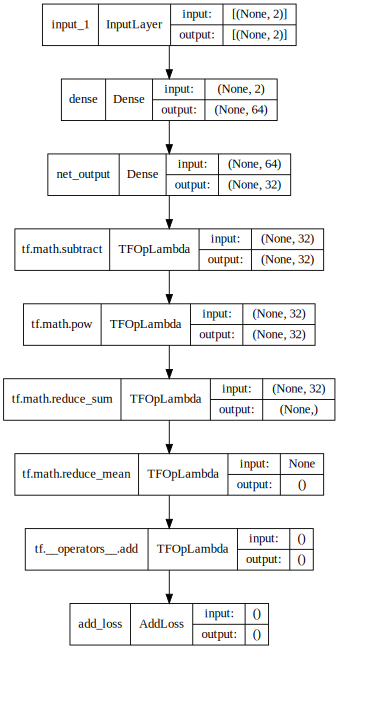

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(clf.model_, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

**Plot the Loss Functions**

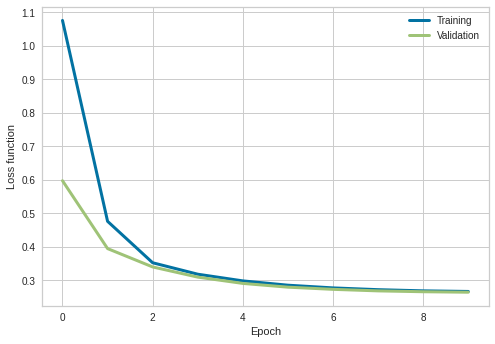

In [18]:
history = clf.history_
plt.plot(history['loss'], linewidth = 3)
plt.plot(history['val_loss'], linewidth = 3)
#plt.title('model loss')
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

**Assign Model**

This function flags each of the data point in the dataset passed during setup stage as either outlier or inlier (1 = outlier, 0 = inlier) using trained model object passed as model param. create_model() function must be called before using assign_model(). This function returns data frame with Outlier flag (1 = outlier, 0 = inlier) and decision score, when score is set to True.

In [48]:
# assign the anomaly labels to our dataset to analyze the result
dfr = assign_model(clf)
dfr.head()

,Sales,Profit,Anomaly,Anomaly_Score
0,0.011552,0.442794,0,0.024594
1,0.032313,0.454639,0,0.023780
2,0.000626,0.440458,0,0.024007
3,0.042280,0.414464,1,0.035840
4,0.000968,0.440168,0,0.024120


In [42]:
#Labels
y = dfr['Anomaly']

#Determine the number of anomalous and normal instances in the dataset.
anomalous = y[y == 1]
normal = y[y == 0]
outlier_fraction = len(anomalous)/float(len(normal))

#Now let us print the outlier fraction and number of anomalous and normal instances
print(outlier_fraction)
print("Anomalous Instances : {}".format(len(anomalous)))
print("Normal Instances : {}".format(len(normal)))

0.052664840952180325
Anomalous Instances : 500
Normal Instances : 9494


Show the counts of observations in each categorical bin using bars.

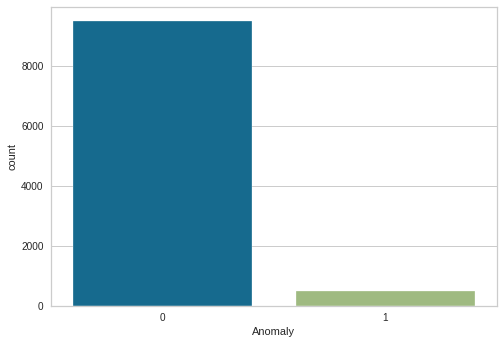

In [43]:
sns.countplot(x="Anomaly", data=dfr)

**Check Anomalies**

In [44]:
dfr[dfr['Anomaly'] == 1].head()

,Sales,Profit,Anomaly,Anomaly_Score
3,0.042280,0.414464,1,0.035840
10,0.075348,0.445687,1,0.031462
11,0.040241,0.444557,1,0.027416
27,0.136186,0.328996,1,0.044951
35,0.048463,0.448231,1,0.027359


**Plot Anomaly Scores**

0.05446461103856564


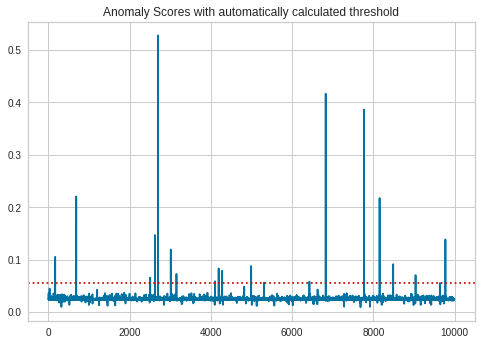

In [45]:
# calculate threshold
tau = clf.threshold_*2
print(tau)

plt.plot(dfr['Anomaly_Score']);
plt.axhline(y=tau, c='r', ls='dotted', label='threshoold');
plt.title('Anomaly Scores with automatically calculated threshold');

In [ ]:
#newContaminationFraction = 0.01
#newScoreThreshold = np.quantile(df['Anomaly_Score'],1-newContaminationFraction)

#**Classification**

In [49]:
dfr = dfr.drop(columns=['Anomaly_Score'])
dfr.head()

,Sales,Profit,Anomaly
0,0.011552,0.442794,0
1,0.032313,0.454639,0
2,0.000626,0.440458,0
3,0.042280,0.414464,1
4,0.000968,0.440168,0


In [50]:
data = dfr.sample(frac=0.9, random_state=786)
data_unseen = dfr.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (8995, 3)
Unseen Data For Predictions: (999, 3)


In [51]:
from pycaret.classification import *
mdl = setup(data=data, target='Anomaly', train_size=0.7, session_id=123, fix_imbalance = True)

,Description,Value
0,session_id,123
1,Target,Anomaly
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8995, 3)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


**Create a Model**

There are 18 classifiers available in the model library of PyCaret. For example, we can use the logistic regression.

In [52]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9429,0.9654,0.8000,0.4444,0.5714,0.5435,0.5705
1,0.9397,0.9741,0.9333,0.4375,0.5957,0.5677,0.6156
2,0.9413,0.9677,0.8387,0.4483,0.5843,0.5558,0.5875
3,0.9381,0.9634,0.7742,0.4286,0.5517,0.5214,0.5478
4,0.9381,0.9701,0.8065,0.4310,0.5618,0.5318,0.5621
5,0.9254,0.9615,0.8387,0.3824,0.5253,0.4908,0.5358
6,0.9316,0.9641,0.8333,0.3968,0.5376,0.5057,0.5465
7,0.9412,0.9656,0.8333,0.4386,0.5747,0.5464,0.5790
8,0.9316,0.9612,0.7667,0.3898,0.5169,0.4842,0.5165
9,0.9300,0.9616,0.8000,0.3871,0.5217,0.4889,0.5266


**Plot a Model**

Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are 15 different plots available, please see the plot_model() docstring for the list of available plots.

In [53]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Predict on unseen data**

The predict_model() function is also used to predict on the unseen dataset.

In [54]:
predict_model(lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9378,0.9707,0.8652,0.4502,0.5922,0.5621,0.5975


**Best Model**

In [55]:
 #show the best model and their statistics
 BestModel = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9951,0.9996,0.9835,0.9222,0.9512,0.9487,0.9496,0.559
rf,Random Forest Classifier,0.9944,0.9992,0.9801,0.9130,0.9446,0.9417,0.9428,0.811
lightgbm,Light Gradient Boosting Machine,0.9943,0.9992,0.9702,0.9189,0.9425,0.9395,0.9406,0.126
dt,Decision Tree Classifier,0.9940,0.9795,0.9635,0.9187,0.9392,0.9361,0.9371,0.025
knn,K Neighbors Classifier,0.9932,0.9971,0.9900,0.8847,0.9337,0.9301,0.9321,0.132
gbc,Gradient Boosting Classifier,0.9887,0.9981,0.9835,0.8229,0.8948,0.8889,0.8936,0.655
ada,Ada Boost Classifier,0.9636,0.9943,0.9572,0.5781,0.7192,0.7012,0.7276,0.259
qda,Quadratic Discriminant Analysis,0.9622,0.9790,0.7369,0.5879,0.6527,0.6330,0.6383,0.019
lda,Linear Discriminant Analysis,0.9579,0.9794,0.7070,0.5507,0.6185,0.5967,0.6022,0.020
ridge,Ridge Classifier,0.9563,0.0000,0.7004,0.5371,0.6073,0.5846,0.5908,0.017


In [57]:
BestModel

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune a Model**

When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

In [58]:
## tune hyperparameters with scikit-learn (default)
BestModel = tune_model(BestModel)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8905,0.9256,0.8667,0.2857,0.4298,0.3858,0.4594
1,0.8952,0.9608,1.0000,0.3125,0.4762,0.4352,0.5274
2,0.8968,0.9400,1.0000,0.3229,0.4882,0.4471,0.5365
3,0.9143,0.9678,1.0000,0.3647,0.5345,0.4983,0.5760
4,0.9175,0.9631,1.0000,0.3735,0.5439,0.5087,0.5840
5,0.8937,0.9473,0.9677,0.3125,0.4724,0.4300,0.5161
6,0.9110,0.9615,1.0000,0.3488,0.5172,0.4805,0.5623
7,0.9237,0.9651,1.0000,0.3846,0.5556,0.5227,0.5948
8,0.9062,0.9622,1.0000,0.3371,0.5042,0.4661,0.5513
9,0.8935,0.9732,1.0000,0.3093,0.4724,0.4310,0.5241


In [59]:
BestModel

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.2,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=110, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 21)

print('Training Data for Modeling: ' + str(X_train.shape))
print('Test Data For Predictions: ' + str(X_test.shape))

Training Data for Modeling: (6995, 2)
Test Data For Predictions: (2999, 2)


In [61]:
# Predictions on test set
unseen_predictions = predict_model(BestModel)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9081,0.9757,0.9929,0.3618,0.5303,0.4913,0.5691


,Sales,Profit,Anomaly,Label,Score
0,0.012347,0.445226,0,0,0.5059
1,0.008725,0.443827,0,0,0.5059
2,0.001742,0.440984,0,0,0.5129
3,0.001412,0.441037,0,0,0.5129
4,0.015658,0.441183,0,0,0.5059


The Label and Score columns are added onto the test set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

**Finalize Model for Deployment**

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc.

In [62]:
BestModel = finalize_model(BestModel)
BestModel
predict_model(BestModel);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9174,0.9669,0.9929,0.3867,0.5567,0.5206,0.5916


The predict_model() function is also used to predict on the unseen dataset. 

In [63]:
evaluate_model(BestModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…